In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Apple (AAPL) hissesinin verileri 2020 başından bu yana 
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")

df.to_csv(f"{ticker}_stock.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009102,72.771729,71.783947,71.941313,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1257 non-null   float64
 1   (High, AAPL)    1257 non-null   float64
 2   (Low, AAPL)     1257 non-null   float64
 3   (Open, AAPL)    1257 non-null   float64
 4   (Volume, AAPL)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [7]:
df.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

<Figure size 1200x600 with 0 Axes>

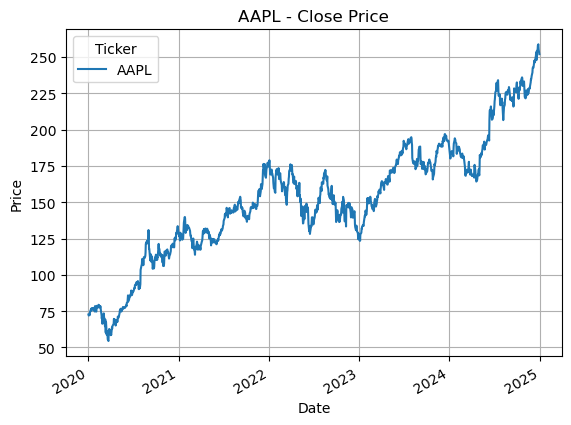

In [8]:
plt.figure(figsize=(12, 6))
df['Close'].plot(title=f"{ticker} - Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

In [10]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,152.099694,153.628459,150.393243,151.942834,9.061449e+07
std,41.998935,42.137927,41.773141,41.938210,5.325627e+07
min,54.449890,55.452156,51.595986,55.350231,2.323470e+07
25%,126.916954,128.007157,124.891233,126.388684,5.546960e+07
50%,150.734467,152.492157,148.730080,150.559444,7.629970e+07
75%,176.675110,178.382604,175.237269,176.521166,1.077601e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


In [11]:
# 20 günlük ve 50 günlük hareketli ortalama
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()


In [13]:
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Close'].shift(2)
df['Lag3'] = df['Close'].shift(3)


In [14]:
df.head(
    
)

Price,Close,High,Low,Open,Volume,MA20,MA50,Lag1,Lag2,Lag3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,NaN,NaN,NaN,NaN,NaN
2020-01-03,72.009102,72.771729,71.783947,71.941313,146322800,NaN,NaN,72.716072,NaN,NaN
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.009102,72.716072,NaN
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000,NaN,NaN,72.582916,72.009102,72.716072
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,NaN,NaN,72.241539,72.582916,72.009102


In [15]:
df['Target'] = df['Close'].shift(-1) > df['Close']
df['Target'] = df['Target'].astype(int)


In [ ]:
df.head(8)

Price,Close,High,Low,Open,Volume,MA20,MA50,Lag1,Lag2,Lag3,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,NaN,NaN,NaN,NaN,NaN,0
2020-01-03,72.009102,72.771729,71.783947,71.941313,146322800,NaN,NaN,72.716072,NaN,NaN,1
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.009102,72.716072,NaN,0
2020-01-07,72.241539,72.849216,72.021223,72.592586,108872000,NaN,NaN,72.582916,72.009102,72.716072,1
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,NaN,NaN,72.241539,72.582916,72.009102,1
